# The Expectation-Maximation(EM) Algorithm for Gaussian Mixture   

- Dataset: Old Faithful Geyser Dataset
- Approach: k-means, GMM model with expectation-maximation(EM)

**(a). ** The alternate algorithm $k-means$ is a special case of the $EM$ algorithm with: 

** $E-step$ as: **

Assign data points to the closest means (Update the cluster): 

$C_{t(i)} = argmin_{j=1,...,k} \hspace{1mm}||X_{i}-\mu_{j}^{i-1}||_{2}^{2}$

**and $M-step$ as:  **

Compute cluster means for cluster $C_{t-1}$ for $t=1,2,...$: 

$\mu_{j}^{(i-1)} = \tfrac{1}{n_{j}^{(i-1)}} \sum\limits_{i: C_{(i)=j}} x_{i}, \hspace{5mm} for \hspace{2mm}\forall \hspace{1mm}j = i,...,k$


**(b). ** Old Faithful Geyser  




In [12]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import random
%matplotlib inline

data = []
with open("eruption.txt","r") as f:
    for line in f:
        data.append(line.replace("\n", "").split("      ")[1:3])
data = np.array(data, dtype="float64")
n_samples, n_feature = data.shape
print ("272 observations of geyser, each with 2 entries: (a eruption time and a waiting time)")
print ("shape: ({},{})".format(n_samples, n_feature))

272 observations of geyser, each with 2 entries: (a eruption time and a waiting time)
shape: (272,2)


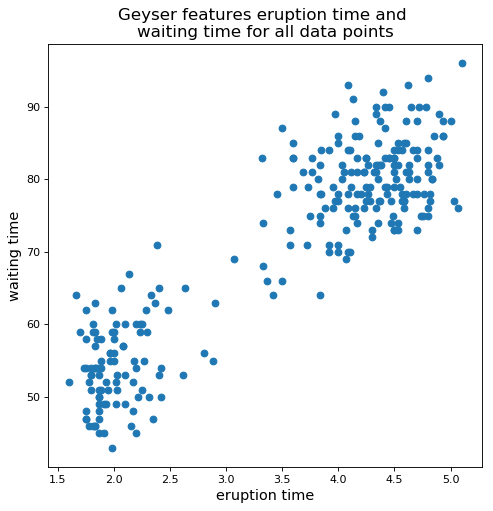

In [13]:
plt.figure(figsize=(7, 7), dpi=80)
plt.scatter(data[:,0], data[:,1])
plt.xlabel("eruption time", fontsize=13)
plt.ylabel("waiting time", fontsize=13)
plt.title("Geyser features eruption time and \nwaiting time for all data points", fontsize=15)
plt.show()

##  Implement bimodal $GMM$ model and fit using $EM$.
- Recall **cluster responsibility** $\sigma$  for data point $x_{i}$ in cluster $k$, given parameters $Θ$ is computed as: 

\begin{equation}
\hat{\gamma}  =  P(z_{ik} = 1 | x_{i}, Θ) = \tfrac{\hat{\pi_{k}} \varphi_{k} (x_{i} | z_{k}, Θ_{k})}{\sum\limits_{m=1}^{K}\hat{\pi_{m}} \varphi_{m} (x_{i} | z_{m}, Θ_{m})}, \hspace{3mm} 1 \leq k \leq K, 1 \leq i \leq N
\end{equation}

$\hspace{0.7cm}$ Here, $K=2$, and could use $\pi$ could be $\pi$ and $(1-\pi)$ for two clusters.

- **Our Termination criteria:** Convergence is generally detected by computing the value of the log-likelihood after each iteration and we halted the algorithm when it appears not to be changing in a signiﬁcant manner from one iteration to the next. In this case,  we terminate the algorithm after 50 iterations or when the log likelihood difference between two iteration is less than $1e-6$, whichever comes first:

$\hspace{0.7cm}$The log-likelihood is deﬁned as follows:

\begin{equation}
log\hspace{1mm}l(Θ) = \sum\limits_{i=1}^{N}log\hspace{1mm}\varphi(\hspace{1mm}x_{i}|Θ) = \sum\limits_{i=1}^{N}(log\hspace{0.5mm} \sum\limits_{i=1}^{K}\pi_{k}\varphi_{k}(\hspace{1mm}x_{i}|Θ)\hspace{1mm})  
\end{equation}

$\hspace{0.7cm}$ where $\varphi_{k}(x_{i}|z_{k},Θ_{k})$ is the Gaussian density for the $k^{th}$ mixture component 

###  (c) random initializaiton

- **The parameter initialization**: model params $(\pi, \mu_{0}, \mu_{1}, \sigma_{0}^{2}, \sigma_{1}^{2})$ could be chosen randomly. 
- In this case, we sampled randomly from Gaussian distribution with the *mean* and *std* of the whole dataset for cluster variances. We assume the covariance matrix is spherical
- As the data point is multi-dimensional (2 features in this case), the means are separately sampled for each two features from Gaussianc distribution with the *mean* and *std* of the original dataset of its own column of feature datapoints. 



In [36]:
# from algorithm.GMMmodel import GMMmodel
model = GMMmodel()
model.step(data)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

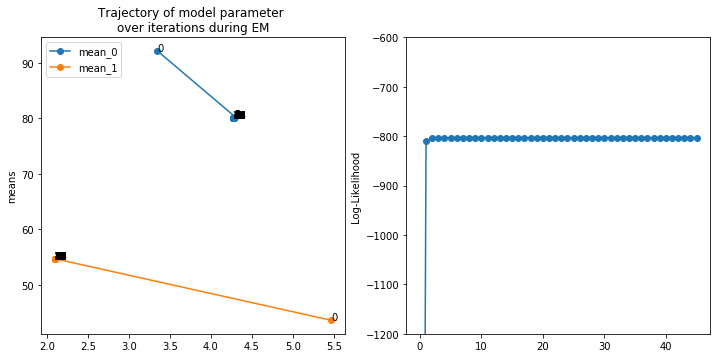

log-likelihood: -802.7  
with centers and variance for 2 clusters: 
 [4.274416754102517, 80.0950279637726], (variance: [34.588827258581354]) 
 [2.0954502902196643, 54.61675623188097], (variance: [34.62192814291847])


Over the 50 trails, the distribution of number of steps 
for algorithm to converge and terminate is as follows.


C:\Users\celix\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\celix\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


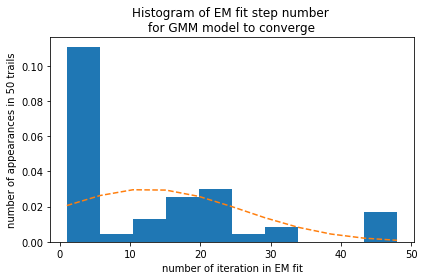

In [40]:
import pylab as pl
import scipy.stats as stats
import matplotlib.mlab as mlab

h, h_score, h_score_traj = [], [], []
h_means, h_vars = [], []
for __ in range(50):
    model = GMMmodel()
    model.step(data)
    h.append(model._step)
    h_score.append(model._log_lik_recall[-1])
    h_score_traj.append(model._log_lik_recall)
    h_means.append([model._mean_0, model._mean_1])
    h_vars.append([model._var_0, model._var_1])
model.plot()
print ("log-likelihood: {}  \n=================".format(str(model._log_lik_recall[-1])[:6]))
print ("with centers and variance for 2 clusters: \n {}, (variance: {}) \n {}, (variance: {})".format(model._mean_0_recall[-1], model._var_0.tolist(), model._mean_1_recall[-1], model._var_1.tolist())) 

fig, ax = plt.subplots()
n, bins, patches = ax.hist(h, 10, normed=1)
y = mlab.normpdf(bins, np.mean(h), np.std(h))
ax.plot(bins, y, '--')
ax.set_xlabel('number of iteration in EM fit')
ax.set_ylabel('number of appearances in 50 trails')
ax.set_title('Histogram of EM fit step number \nfor GMM model to converge')
print ("\n\nOver the 50 trails, the distribution of number of steps \nfor algorithm to converge and terminate is as follows.")
fig.tight_layout() 
plt.show() 

# compute best trail
idx = h_score.index(max(h_score))
c1, c2 = h_means[idx]

### (d) K-means  

Using the $K-Means$  algorithm to cluster the data ﬁrst and then deﬁning weights based on $K-Means$ memberships

In [42]:
from sklearn.cluster import KMeans
def k_meansGMM():
    kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
    data_Y = kmeans.labels_
    center0, center1 = kmeans.cluster_centers_    # shape=[n_clusters, n_features]
    
    # compute var, pi, mean based on K-means clustering results
    var_0 = np.var([data[i].tolist() for i in range(len(data_Y)) if data_Y[i] == 0 ], axis=0)
    var_1 = np.var([data[i].tolist() for i in range(len(data_Y)) if data_Y[i] == 1 ], axis=0)
    
    pi = np.count_nonzero(data_Y == 1)/len(data_Y)

    kmodel = GMMmodel(mean_0=center0,
                      mean_1=center1,
                      var_0=var_0,
                      var_1=var_1,
                      pi=pi)
    return kmodel, center0, center1 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

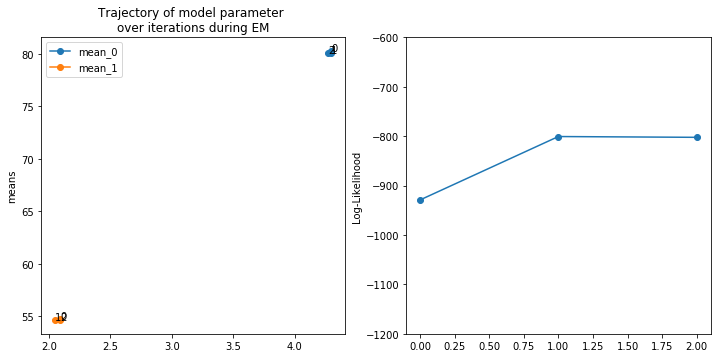

log-likelihood: -802.4  
with centers and variance for 2 clusters: 
 [4.272937707947511, 80.0804912502408], [34.79097120396489] 
 [2.094494939706704, 54.600692169481206], [34.51422187212819]


In [43]:
kmodel, center0, center1 =k_meansGMM()
kmodel.step(data)
kmodel.plot()
print ("log-likelihood: {}  \n=================".format(str(kmodel._log_lik_recall[-1])[:6]))
print ("with centers and variance for 2 clusters: \n {}, {} \n {}, {}".format(kmodel._mean_0_recall[-1], kmodel._var_0.tolist(), kmodel._mean_1_recall[-1], kmodel._var_1.tolist())) 

In [44]:
hk = []
hk_score = []
c1, c2 = None, None
for __ in range(50):
    kmodel, c1, c2  = k_meansGMM()
    kmodel.step(data)
    hk.append(kmodel._step)
    hk_score.append(kmodel._log_lik_recall[-1])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

                              COMPARISON REPORT
--------------------------------------------------------------------------------
   EM fit Gaussian Mixture Models: random initi  v.s. k-means guide initi

______________________________
| log-likelihood Performance |
|   Comparison (avg over 50) |
------------------------------
|    |random ini |k-means ini|
|    | -722.67   |  -802.43  |
------------------------------

The centers obtained are:
random ini:  c1: (4.29, 80.2), c2: (2.09, 54.7)
k-means ini: c1: (2.09, 54.6), c2: (4.27, 80.0)


The distribution graph (top right) plots the number of steps for algorithm to converge with 50 trails
, it is found that with k-means initial guess for model parameters, the convergence speed was increased 
by a large margin (only 1-2 steps of updates versus 20+ step of iterations using random initialization). Also
using random initialization was unstable in terms of convergence speed, i.e the convergence step was quite 
**sensitive** to the "lucky g

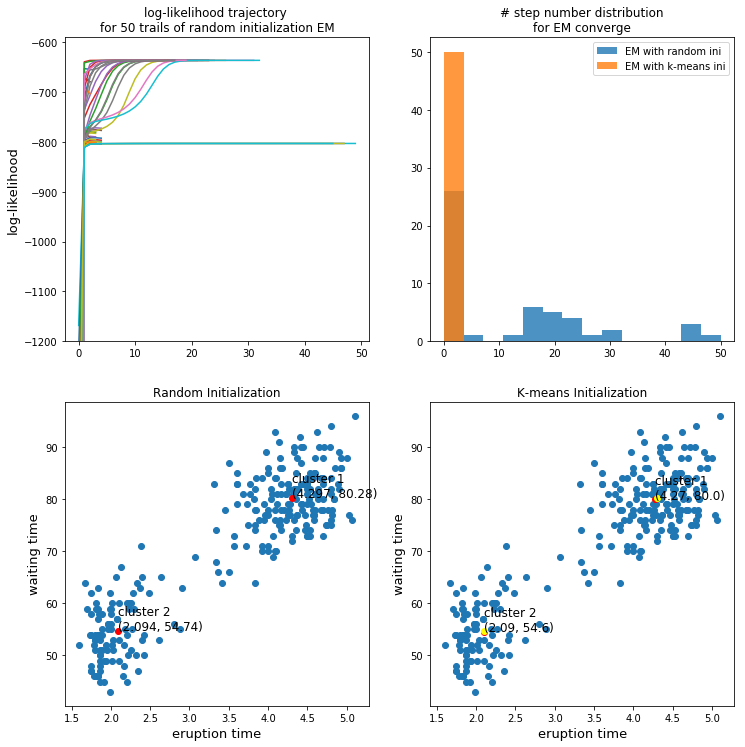

In [45]:
from matplotlib import pyplot
print (" "*30+"COMPARISON REPORT\n"+"-"*80)
print ("   EM fit Gaussian Mixture Models: random initi  v.s. k-means guide initi\n")
print ("_"*30)
print ("| log-likelihood Performance |\n|   Comparison (avg over 50) |")
print ("-"*30)
print ("|"+" "*4+"|random ini |k-means ini|")
print ("|"+" "*4+"| {}   |  {}  |".format(str(sum(h_score)/50.)[:7], str(max(hk_score))[:7]))
print ("-"*30)

print ("\nThe centers obtained are:")
print ("random ini:  c1: ({}, {}), c2: ({}, {})".format(str(c1[0])[:4], str(c1[1])[:4], str(c2[0])[:4], str(c2[1])[:4]))
print ("k-means ini: c1: ({}, {}), c2: ({}, {})".format(str(kmodel._mean_1[0])[:4], str(kmodel._mean_1[1])[:4],str(kmodel._mean_0[0])[:4], str(kmodel._mean_0[1])[:4]))

fig = plt.figure(figsize=(12,19)) 

ax1 = fig.add_subplot(3,2,1) 
ax2 = fig.add_subplot(3,2,2) 

for traj in h_score_traj:
    ax1.plot(traj)
ax1.set_ylim(bottom=-1200, top=-590)
ax1.set_ylabel("log-likelihood", fontsize=13)
ax1.set_title("log-likelihood trajectory \nfor 50 trails of random initialization EM")

print ("\n\nThe distribution graph (top right) plots the number of steps for algorithm to converge with 50 trails\
\n, it is found that with k-means initial guess for model parameters, the convergence speed was increased \
\nby a large margin (only 1-2 steps of updates versus 20+ step of iterations using random initialization). Also\
\nusing random initialization was unstable in terms of convergence speed, i.e the convergence step was quite \
\n**sensitive** to the \"lucky guess\". If the initial guess was far from the optimal centers, then it would take a \
\nmuch longer time to find the solution. The convergence graph of log-likihood graph (top left) also showed the \
\nvariance in convergence manner due to different initialization.")

print("\nThe bottom two plots visualized the clustering results, i.e. centers found for each two clusters, for\
\nrandom guess EM (bottom left) and k-means guess EM (bottom right), respectively.\
\nIt was observed that the k-means initialized EM algorithm showed a more accurate clustering. The yellow dots\
\nmarked the k-means centers, and the red dots marked the final MLE clustering centers after convergence.\
\nCompared to k-means EM clustering, the random guess EM (bottom left) clustering was off, especially\
\nwhen found the center of cluster 2, which actually lies in the range of cluster 1.\n\n")

print ("From the empirical results obtained in the preliminary experiments here, using a k-means initialized \
\nEM algorithm helped to obtain a more accurate clustering, also with much faster speed.\n\n")


bins = np.linspace(0, 50, 15)
pyplot.hist(h, bins, alpha=0.8, label='EM with random ini')
pyplot.hist(hk, bins, alpha=0.8, label='EM with k-means ini')
ax2.set_title('# step number distribution\nfor EM converge')
ax2.legend()

ax3 = fig.add_subplot(3,2,3)   
ax4 = fig.add_subplot(3,2,4)   
ax3.scatter(data[:,0], data[:,1]) 
ax3.scatter(c1[0], c1[1], c="red")
ax3.scatter(c2[0], c2[1], c="red")
ax3.set_title("Random Initialization") 
ax3.set_xlabel("eruption time", fontsize=13) 
ax3.set_ylabel("waiting time", fontsize=13) 
ax3.annotate("cluster 1\n({}, {})".format(str(c1[0])[:5], str(c1[1])[:5]), (c1[0], c1[1]),fontsize=12)
ax3.annotate("cluster 2\n({}, {})".format(str(c2[0])[:5], str(c2[1])[:5]), (c2[0], c2[1]),fontsize=12)
ax4.scatter(data[:,0], data[:,1])
ax4.scatter(kmodel._mean_0[0], kmodel._mean_0[1], c="red")
ax4.scatter(kmodel._mean_1[0], kmodel._mean_1[1], c="red")
ax4.scatter(c1[0], c1[1], c="yellow")
ax4.scatter(c2[0], c2[1], c="yellow")
ax4.set_title("K-means Initialization") 
ax4.set_xlabel("eruption time", fontsize=13) 
ax4.set_ylabel("waiting time", fontsize=13) 
ax4.annotate("cluster 1\n({}, {})".format(str(kmodel._mean_0[0])[:4], str(kmodel._mean_0[1])[:4]), (kmodel._mean_0[0], kmodel._mean_0[1]), fontsize=12)
ax4.annotate("cluster 2\n({}, {})".format(str(kmodel._mean_1[0])[:4], str(kmodel._mean_1[1])[:4]), (kmodel._mean_1[0], kmodel._mean_1[1]),fontsize=12)

plt.show()


    
